In [104]:
import re
import pandas as pd
%pylab inline
from matplotlib import pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')

import sys
!pip install vaderSentiment

# import pysentiment as ps
# !{sys.executable} -m pip install pysentiment
# nltk.download('vader_lexicon')

from nltk import sentiment
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Populating the interactive namespace from numpy and matplotlib


In [54]:
df = pd.read_csv(r'C:\Users\Abraham\MSBA\Text\Project\tweets_4_4.csv')
df.columns = ['ID','Screen_Name','Followers','Retweet','InReplyTo','Favorite','Friends','Listed','Location','Text']

df_raw = df[df['Location'].notnull()].drop_duplicates()

## Dummy for Texas

In [55]:
def findtx(s):
    intexas = 0
    s=str(s).lower()
    tx1 = re.findall('tx',s)
    tx2 = re.findall('texas',s)
    
    if len(tx1)>0 or len(tx2)>0:
        intexas = 1 
    return intexas

df_raw['Texas'] = 0
df_raw['Texas'] = df_raw['Location'].map(findtx)

## Dummy for Urban/City

In [56]:
citystr = 'houston|austin|san antonio|dallas|fort worth|dfw|atx|hou|htx|dtx|dal|el paso|corpus christi|\
sanantonio|fortworth|elpaso|laredo|arlington|plano|corpuschristi'

def findcities(s):
    urban = 0
    s=str(s).lower()
    citiesfound = re.findall(citystr,s)
    if len(citiesfound) > 0 :
        urban = 1
    return urban

df_raw['Urban'] = 0
df_raw['Urban'] = df_raw['Location'].map(findcities)

## Dummy for Candidates

In [57]:
def findbeto(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall('beto',s)
    if len(txt1) > 0:
        beto = 1
    return beto

df_raw['Beto'] = df_raw['Text'].map(findbeto)

def findcruz(s):
    cruz = 0
    s = str(s).lower()
    txt1 = re.findall('cruz',s)
    if len(txt1) > 0:
        cruz = 1
    return cruz

df_raw['Cruz'] = df_raw['Text'].map(findcruz)

## Overal Sentiment for each tweet

In [119]:
#Returns compound sentiment score between -1 and 1
def getScores(s):
    score = SentimentIntensityAnalyzer().polarity_scores(s)
    return score['compound']

df_raw['Score'] = df_raw['Text'].map(getScores)

In [89]:
dftx = df_raw[df_raw['Texas']==1]

## Beto Sentiments in different regions

Nationwide Beto Sentiment:  0.015199209486165986


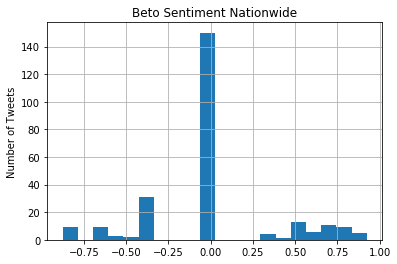

In [113]:
#Beto Sentiment Nationwide
df_raw[df_raw['Beto']==1]['Score'].hist(bins=20)
plt.title('Beto Sentiment Nationwide')
plt.ylabel('Number of Tweets')

senti_betonation = df_raw[df_raw['Beto']==1]['Score'].mean()
print('Nationwide Beto Sentiment: ', senti_betonation)

Texas Beto Sentiment:  -0.03388157894736841


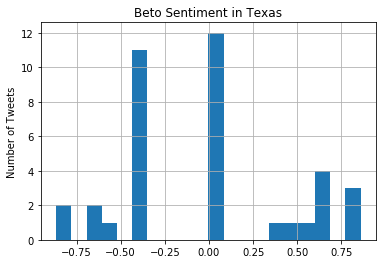

In [114]:
#Beto Sentiment in Texas
dftx[dftx['Beto']==1]['Score'].hist(bins=20)
plt.title('Beto Sentiment in Texas')
plt.ylabel('Number of Tweets')

senti_betotexas = dftx[dftx['Beto']==1]['Score'].mean()
print('Texas Beto Sentiment: ', senti_betotexas)

Texas Urban Beto Sentiment:  0.04618461538461539


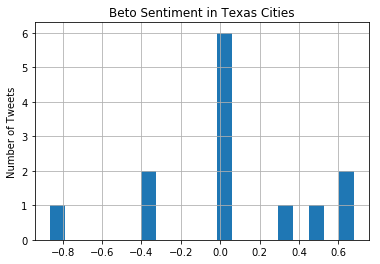

In [115]:
#Beto Sentiment in Texas Cities
dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].hist(bins=20)
plt.title('Beto Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')

senti_betotxurban = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Beto Sentiment: ', senti_betotxurban)

Rural Texas Beto Sentiment:  -0.07551599999999997


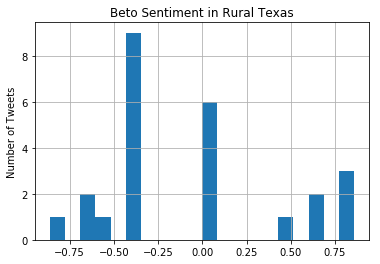

In [116]:
#Beto Sentiment in Rural Texas
dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].hist(bins=20)
plt.title('Beto Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')

senti_betotxrural = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Beto Sentiment: ', senti_betotxrural)

## Cruz Sentiments in different regions

Nationwide Cruz Sentiment:  0.4518561926605534


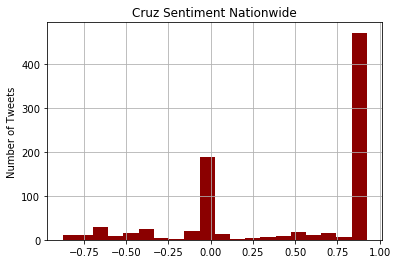

In [121]:
#Cruz Sentiment Nationwide
df_raw[df_raw['Cruz']==1]['Score'].hist(bins=20, color='darkred')
plt.title('Cruz Sentiment Nationwide')
plt.ylabel('Number of Tweets')

senti_cruznation = df_raw[df_raw['Cruz']==1]['Score'].mean()
print('Nationwide Cruz Sentiment: ', senti_cruznation)

Texas Cruz Sentiment:  0.34598187500000016


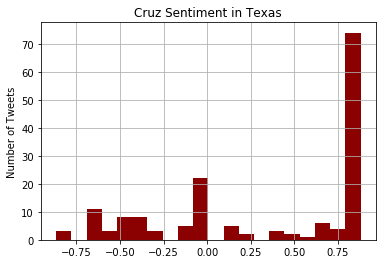

In [122]:
#Cruz Sentiment in Texas
dftx[dftx['Cruz']==1]['Score'].hist(bins=20, color='darkred')
plt.title('Cruz Sentiment in Texas')
plt.ylabel('Number of Tweets')

senti_cruztexas = dftx[dftx['Cruz']==1]['Score'].mean()
print('Texas Cruz Sentiment: ', senti_cruztexas)

Texas Urban Cruz Sentiment:  0.43307555555555566


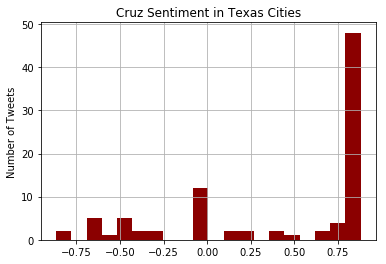

In [123]:
#Cruz Sentiment in Texas Cities
dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].hist(bins=20, color='darkred')
plt.title('Cruz Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')

senti_cruztxurban = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Cruz Sentiment: ', senti_cruztxurban)

Rural Texas Cruz Sentiment:  0.2340042857142858


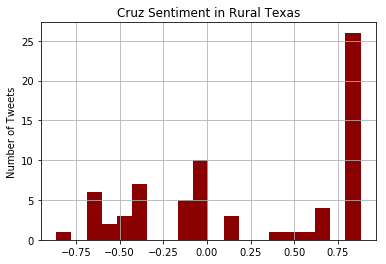

In [125]:
#Cruz Sentiment in Rural Texas
dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].hist(bins=20, color='darkred')
plt.title('Cruz Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')

senti_cruztxrural = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Cruz Sentiment: ', senti_cruztxrural)

# Lift in Texas (urban vs rural)

In [90]:
#Lift Beto and City
prbeto = dftx['Beto'].mean()
prcity = dftx['Urban'].mean() #About 52% urban

betocity = dftx[dftx['Beto']==1]['Urban'].sum()
prbetocity = betocity/len(dftx)

lift_betocity = prbetocity/(prbeto*prcity)
lift_betocity

0.6536654135338347

In [91]:
#Lift Beto and Rural
betorural = len(dftx[dftx['Beto']==1]['Urban']) - betocity
prbetorural = betorural/len(dftx)

lift_betorural = prbetorural/(prbeto*(1-prcity))
lift_betorural

1.3802889576883384

In [92]:
#Lift Cruz and City
prcruz = dftx['Cruz'].mean()

cruzcity = dftx[dftx['Cruz']==1]['Urban'].sum()
prcruzcity = cruzcity/len(dftx)

lift_cruzcity = prcruzcity/(prcruz*prcity)
lift_cruzcity

1.0747767857142858

In [93]:
#Lift Cruz and Rural
cruzrural = len(dftx[dftx['Cruz']==1]['Urban']) - cruzcity
prcruzrural = cruzrural/len(dftx)

lift_cruzrural = prcruzrural/(prcruz*(1-prcity))
lift_cruzrural

0.917892156862745

In [94]:
dftx

,ID,Screen_Name,Followers,Retweet,InReplyTo,Favorite,Friends,Listed,Location,Text,Texas,Urban,Beto,Cruz,Score
2,924762589288116225,avagracesweetey,1471,268,None,0,1464,2,"San Antonio, TX",RT @AntonioArellano: TEXAS Today is the last d...,1,1,0,1,-0.3400
4,781838159134896128,RickySi16087724,12315,303,None,0,13431,89,Bertram TEXAS,RT @SandraTXAS: Texas do not take our great st...,1,0,0,0,-0.5817
6,789300582435565570,sewwutnow,17622,303,None,0,11540,12,Texas,RT @SandraTXAS: Texas do not take our great st...,1,0,0,0,-0.5817
10,1898977670,lillyhu13,1385,4765,None,0,736,7,"Texas, USA","RT @raven_zoe: TEXAS, tomorrow is the last day...",1,0,0,1,0.8795
11,813831410016460800,maaaaaaaaribel,143,4765,None,0,135,0,tx ct,"RT @raven_zoe: TEXAS, tomorrow is the last day...",1,0,0,1,0.8795
14,3920768475,maganti_rk,4212,303,None,0,4237,7,"Texas, USA",RT @SandraTXAS: Texas do not take our great st...,1,0,0,0,-0.5817
18,14489844,swelljoe,217,71,None,0,766,28,"Austin, TX",RT @j_zimms: I said it earlier today but I thi...,1,1,0,0,0.2960
21,897158013815074816,guyaustin9,4,0,statesman,0,24,0,"Graham, TX","@statesman Come on Texans, be smart and get ri...",1,0,0,1,0.5951
26,847474093876068352,Natmaariee,298,4765,None,0,238,0,"San Antonio, TX","RT @raven_zoe: TEXAS, tomorrow is the last day...",1,1,0,1,0.8795
29,4315886053,breaunabelike,306,56,None,0,151,0,"houston, tx",RT @Nicholas_ted33: A poem about Voters regist...,1,1,0,1,0.7096


In [11]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[(u'NOUN', 30654),
 (u'VERB', 14399),
 (u'ADP', 12355),
 (u'.', 11928),
 (u'DET', 11389),
 (u'ADJ', 6706),
 (u'ADV', 3349),
 (u'CONJ', 2717),
 (u'PRON', 2535),
 (u'PRT', 2264),
 (u'NUM', 2166),
 (u'X', 92)]